In [1]:
# 1️⃣ Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


sns.set(style="whitegrid")
%matplotlib inline

In [2]:
# 2️⃣ Load Dataset
df = pd.read_csv("Agora.csv", encoding="latin-1")
print("Dataset Shape:", df.shape)
df.head()

Dataset Shape: (109689, 9)


,Vendor,Category,Item,Item Description,Price,Origin,Destination,Rating,Remarks
0,CheapPayTV,Services/Hacking,12 Month HuluPlus gift Code,12-Month HuluPlus Codes for $25. They are wort...,0.05027025666666667 BTC,Torland,NaN,4.96/5,NaN
1,CheapPayTV,Services/Hacking,Pay TV Sky UK Sky Germany HD TV and much mor...,Hi we offer a World Wide CCcam Service for En...,0.152419585 BTC,Torland,NaN,4.96/5,NaN
2,KryptykOG,Services/Hacking,OFFICIAL Account Creator Extreme 4.2,Tagged Submission Fix Bebo Submission Fix Adju...,0.007000000000000005 BTC,Torland,NaN,4.93/5,NaN
3,cyberzen,Services/Hacking,VPN > TOR > SOCK TUTORIAL,How to setup a VPN > TOR > SOCK super safe enc...,0.019016783532494728 BTC,NaN,NaN,4.89/5,NaN
4,businessdude,Services/Hacking,Facebook hacking guide,. This guide will teach you how to hack Faceb...,0.062018073963963936 BTC,Torland,NaN,4.88/5,NaN


In [3]:
# ✅Check current column names
print(df.columns)

# Remove leading/trailing spaces from all column names
df.columns = df.columns.str.strip()

# Verify column names again
print(df.columns)


Index(['Vendor', ' Category', ' Item', ' Item Description', ' Price',
       ' Origin', ' Destination', ' Rating', ' Remarks'],
      dtype='object')
Index(['Vendor', 'Category', 'Item', 'Item Description', 'Price', 'Origin',
       'Destination', 'Rating', 'Remarks'],
      dtype='object')


In [4]:
# 3️⃣ Data Cleaning
# 3.1 Price Cleaning

# Ensure Price is string and extract numeric part using regex
df['Price_clean'] = df['Price'].astype(str).str.extract(r'([0-9]+\.?[0-9]*)')[0]

# Convert extracted values to numeric (float), invalid parsing will become NaN
df['Price_clean'] = pd.to_numeric(df['Price_clean'], errors='coerce')

# Drop rows where Price_clean is NaN and reset index
df = df.dropna(subset=['Price_clean']).reset_index(drop=True)

# Quick summary statistics
print("✅ Price column cleaned")
print(df['Price_clean'].describe())


✅ Price column cleaned
count    109680.000000
mean         22.172256
std        1037.678087
min           0.000000
25%           0.123445
50%           0.383066
75%           1.332259
max      130396.089689
Name: Price_clean, dtype: float64


In [5]:
# 3.2 Rating Cleaning
df['Rating_clean'] = df['Rating'].astype(str).str.extract(r'([0-9]*\.?[0-9]+)')[0]
df['Rating_clean'] = pd.to_numeric(df['Rating_clean'], errors='coerce')
print(df['Rating_clean'].describe())

count    109672.000000
mean          4.533471
std           1.301406
min           0.000000
25%           4.860000
50%           4.969000
75%           5.000000
max          15.000000
Name: Rating_clean, dtype: float64


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109680 entries, 0 to 109679
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Vendor            109680 non-null  object 
 1   Category          109680 non-null  object 
 2   Item              109678 non-null  object 
 3   Item Description  109656 non-null  object 
 4   Price             109680 non-null  object 
 5   Origin            99806 non-null   object 
 6   Destination       60524 non-null   object 
 7   Rating            109674 non-null  object 
 8   Remarks           12615 non-null   object 
 9   Price_clean       109680 non-null  float64
 10  Rating_clean      109672 non-null  float64
dtypes: float64(2), object(9)
memory usage: 9.2+ MB


In [7]:
df.describe()

,Price_clean,Rating_clean
count,109680.000000,109672.000000
mean,22.172256,4.533471
std,1037.678087,1.301406
min,0.000000,0.000000
25%,0.123445,4.860000
50%,0.383066,4.969000
75%,1.332259,5.000000
max,130396.089689,15.000000


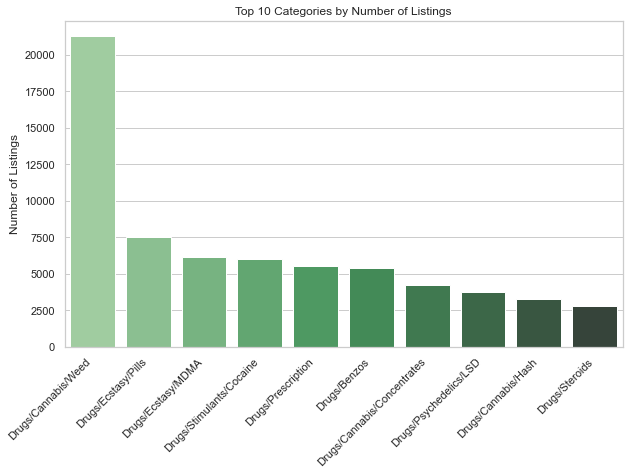

In [10]:
# 4️⃣ EDA
# 4.1 Top 10 Categories by Listings
plt.figure(figsize=(10,6))
top_categories = df['Category'].value_counts().head(10)
sns.barplot(x=top_categories.index, y=top_categories.values, palette="Greens_d")
plt.xticks(rotation=45, ha='right')
plt.title("Top 10 Categories by Number of Listings")
plt.ylabel("Number of Listings")
plt.show()

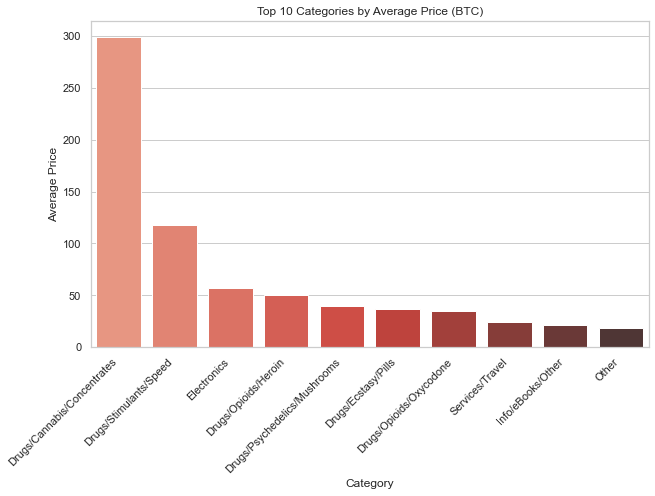

In [11]:
# 4.2 Top 10 Categories by Average Price
plt.figure(figsize=(10,6))
avg_price_category = df.groupby('Category')['Price_clean'].mean().sort_values(ascending=False).head(10)
sns.barplot(x=avg_price_category.index, y=avg_price_category.values, palette="Reds_d")
plt.xticks(rotation=45, ha='right')
plt.title("Top 10 Categories by Average Price (BTC)")
plt.ylabel("Average Price")
plt.show()

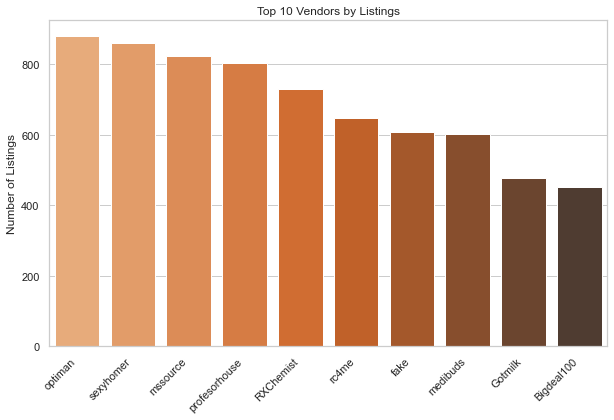

In [12]:
# 4.3 Top 10 Vendors by Listings
plt.figure(figsize=(10,6))
top_vendors = df['Vendor'].value_counts().head(10)
sns.barplot(x=top_vendors.index, y=top_vendors.values, palette="Oranges_d")
plt.xticks(rotation=45, ha='right')
plt.title("Top 10 Vendors by Listings")
plt.ylabel("Number of Listings")
plt.show()

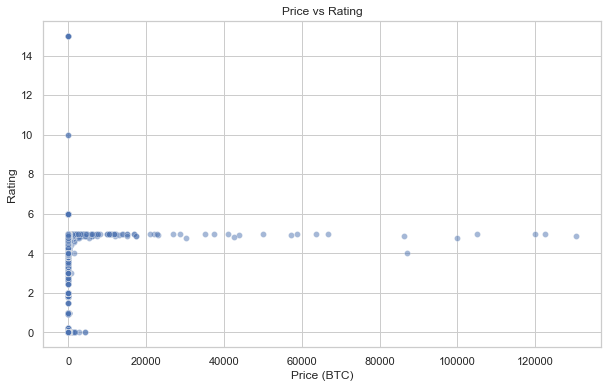

In [13]:
# 4.4 Price vs Rating
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='Price_clean', y='Rating_clean', alpha=0.5)
plt.title("Price vs Rating")
plt.xlabel("Price (BTC)")
plt.ylabel("Rating")
plt.show()

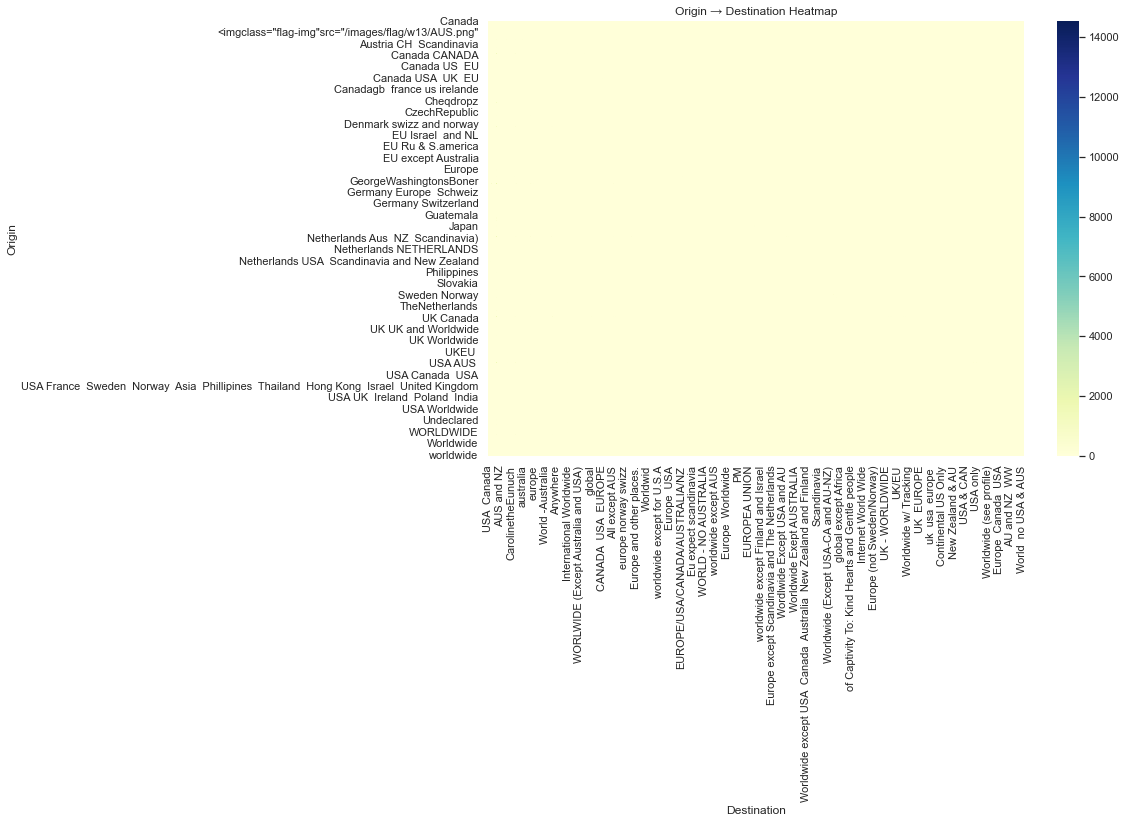

In [14]:
# 4.5 Origin → Destination Heatmap
origin_dest_counts = df.groupby(['Origin','Destination']).size().unstack(fill_value=0)
plt.figure(figsize=(12,8))
sns.heatmap(origin_dest_counts, cmap="YlGnBu")
plt.title("Origin → Destination Heatmap")
plt.show()

In [15]:
# 5️⃣ Suspicious / Outlier Listings
# 5.1 High-priced Outliers (Top 1%)
high_price_threshold = df['Price_clean'].quantile(0.99)
suspicious_items = df[df['Price_clean'] > high_price_threshold]
suspicious_items[['Item', 'Category', 'Vendor', 'Price_clean']]

,Item,Category,Vendor,Price_clean
83,Have something to sell? got an idea?,Services/Other,optiman,4564.000000
667,5000g Ethylone E1 mdec,Drugs/RCs,ChinaChem,41.021815
1380,High Quality Counterfeit Bills $500,Counterfeits/Money,top_vendor1,60.367728
1538,HBO GO Account [LIFETIME + FREEBIES],Data/Accounts,thesecretsociety,1441.466549
4912,Anonymous land in Panama,Other,echo,21985.000000
...,...,...,...,...
107254,1g Raw LSD Xtal Asian xtal,Drugs/Psychedelics/LSD,aalbion,53.247513
107407,AUCTION 1LB/448 grams scleroteria (AKA magi...,Drugs/Psychedelics/Mushrooms,Houba,41018.909717
107408,Best Dutch MDMA Crystals x 5kg,Drugs/Ecstasy/MDMA,starbuy,354.411523
107729,Custom Order Alex_b,Drugs/Cannabis/Weed,Eisman,287.555700


In [16]:
# 5.2 Low-rated Items (Rating < 2)
low_rating_items = df[df['Rating_clean'] < 2]
low_rating_items[['Item', 'Category', 'Vendor', 'Rating_clean']]

,Item,Category,Vendor,Rating_clean
186,10g 4-mec 4mec similar to mephedrone (10 grams...,Drugs/RCs,nanosuit1,1.0
309,2.5g 4-mec 4mec similar to mephedrone (2.5 gra...,Drugs/RCs,nanosuit1,1.0
334,200mg 0.2g a-PVP sample great MDPV replacement,Drugs/RCs,nanosuit1,1.0
335,0.5g 4-mec 4mec similar to mephedrone (0.5 gra...,Drugs/RCs,nanosuit1,1.0
338,3.5g 4-mec 4mec similar to mephedrone (3.5 gra...,Drugs/RCs,nanosuit1,1.0
...,...,...,...,...
109665,Methadone,Drugs/Opioids/Opium,TheAmericanOutfit,0.0
109669,Refined Spanish Opium 1 gr,Drugs/Opioids/Opium,OPIOID5,0.0
109676,Shipping Ticket,Weapons/Fireworks,cheqdropz,0.0
109677,0.50 GRAMS #4 White Afghani Heroin - FULL ESCROW,Drugs/Opioids/Opium,SnowQueen,0.0


# 6️⃣ Summary & Insights
summary = f"""
# Agora Marketplace Analysis - Summary


## Dataset Overview
- Total Listings: {df.shape[0]}
- Features: {list(df.columns)}
- Missing values handled for Price and Rating.


## Key Insights
1. Top Categories by Number of Listings: {top_categories.to_dict()}
2. Top Categories by Average Price: {avg_price_category.to_dict()}
3. Top Vendors by Listings: {top_vendors.to_dict()}
4. Price vs Rating: Most products cluster at low-to-mid prices with high ratings.
5. Origin-Destination Patterns: Main trade routes identified in heatmap.


## Suspicious / Outlier Listings
- High-priced outliers (Top 1%): {suspicious_items.shape[0]} listings
- Low-rated items (Rating < 2): {low_rating_items.shape[0]} listings


✅ Ready for decision-making or presentation.

In [17]:
# 7️⃣ Save Cleaned Dataset (Optional)
df.to_csv("Agora_cleaned.csv", index=False)
print("✅ Cleaned dataset saved as 'Agora_cleaned.csv'")

✅ Cleaned dataset saved as 'Agora_cleaned.csv'
